In [51]:
import pandas as pd

from ydata_profiling import ProfileReport
from IPython.display import display, HTML
import ydata_profiling

import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [31]:
df1=pd.read_csv(r"C:\Users\soorn\Downloads\subject-info.csv")

In [33]:
df2=pd.read_csv(r"C:\Users\soorn\Downloads\test_measure.csv")

In [78]:
df1['ID'] = df1['ID'].astype(str)  # or .astype(int) if you prefer
df2['ID_test'] = df2['ID_test'].astype(str)

merged_df = pd.merge(df1, df2, left_on='ID', right_on='ID_test', how='outer')



In [35]:
#34.create an array ,np.arange(12).reshape(3,4).Replace the array elements with their square values if the element is an even number. Keep the odd numbers as such. 
#Display the resulting array.


arr = np.arange(12).reshape(3, 4)

result = np.where(arr % 2 == 0, arr**2, arr)

print("Original array:\n", arr)
print("\nModified array:\n", result)

Original array:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Modified array:
 [[  0   1   4   3]
 [ 16   5  36   7]
 [ 64   9 100  11]]


In [37]:
#35.Read 10 records from dataframe and convert into json format and print the data

first_10_records = df2.head(10)

json_data = first_10_records.to_json(orient='records', indent=4)

print(json_data)


[
    {
        "time":0,
        "Speed":5.0,
        "HR":63.0,
        "VO2":478.0,
        "VCO2":360.0,
        "RR":27,
        "VE":13.3,
        "ID_test":"2_1",
        "ID":2
    },
    {
        "time":2,
        "Speed":5.0,
        "HR":75.0,
        "VO2":401.0,
        "VCO2":295.0,
        "RR":23,
        "VE":10.3,
        "ID_test":"2_1",
        "ID":2
    },
    {
        "time":4,
        "Speed":5.0,
        "HR":82.0,
        "VO2":449.0,
        "VCO2":319.0,
        "RR":29,
        "VE":12.2,
        "ID_test":"2_1",
        "ID":2
    },
    {
        "time":7,
        "Speed":5.0,
        "HR":87.0,
        "VO2":461.0,
        "VCO2":340.0,
        "RR":28,
        "VE":12.8,
        "ID_test":"2_1",
        "ID":2
    },
    {
        "time":9,
        "Speed":5.0,
        "HR":92.0,
        "VO2":574.0,
        "VCO2":417.0,
        "RR":28,
        "VE":14.6,
        "ID_test":"2_1",
        "ID":2
    },
    {
        "time":11,
        "Speed":5.0,
  

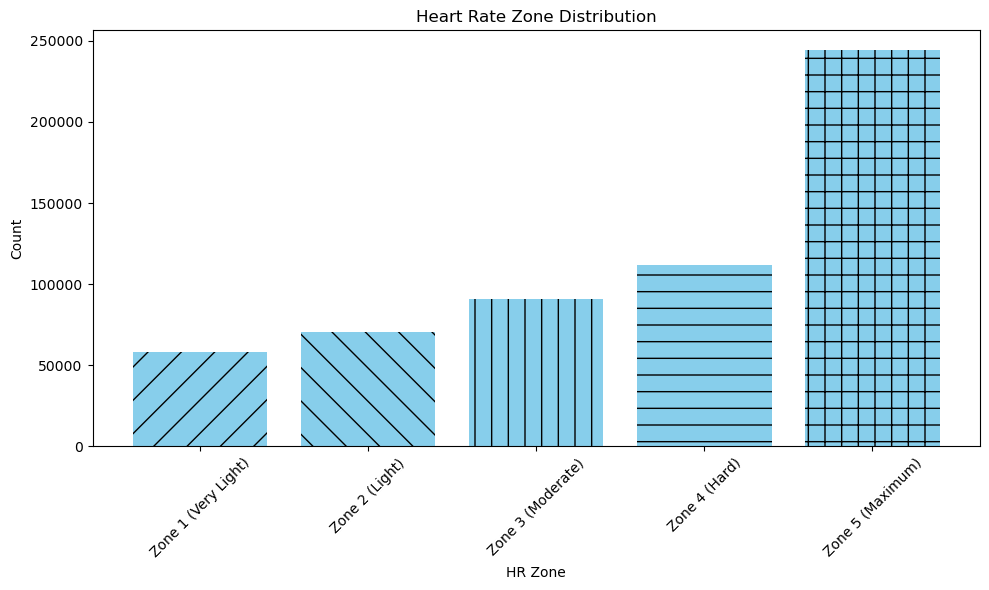

In [39]:
#36.Create a barchart for HR Zone vs count and apply hatches to the bars.

# Define HR zones (adjust the ranges as needed)
def classify_hr_zone(hr):
    if hr < 100:
        return "Zone 1 (Very Light)"
    elif hr < 120:
        return "Zone 2 (Light)"
    elif hr < 140:
        return "Zone 3 (Moderate)"
    elif hr < 160:
        return "Zone 4 (Hard)"
    else:
        return "Zone 5 (Maximum)"

# Apply HR zone classification
df2["HR Zone"] = df2["HR"].apply(classify_hr_zone)

# Count how many times each HR zone appears
zone_counts = df2["HR Zone"].value_counts().sort_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(zone_counts.index, zone_counts.values, color='skyblue')

# Apply unique hatch patterns to each bar
hatches = ['/', '\\', '|', '-', '+']
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

# Chart formatting
ax.set_title("Heart Rate Zone Distribution")
ax.set_xlabel("HR Zone")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [41]:
#37.Who is the youngest athlete and how many tests did she take part in?


# Filter only female athletes (Sex == 0)
female_athletes = df1[df1['Sex'] == 0]

# Find the youngest female athlete
youngest_female = female_athletes.loc[female_athletes['Age'].idxmin()]

# Get her ID
youngest_female_id = youngest_female['ID']

# Count how many unique tests she participated in
num_tests = df2[df2['ID'] == youngest_female_id]['ID_test'].nunique()

# Output the result
print(f"Youngest female athlete:")
print(f"ID: {youngest_female_id}")
print(f"Age: {youngest_female['Age']}")
print(f"Number of tests participated in: {num_tests}")


Youngest female athlete:
ID: 829
Age: 12.2
Number of tests participated in: 1


In [53]:
#41 Perform an EDA of subject_info using YDATA Profiling.

# Create the profiling report
profile = ProfileReport(df1, title="Subject Info EDA Report", explorative=True)
display(profile.to_notebook_iframe())


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 240.61it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

None

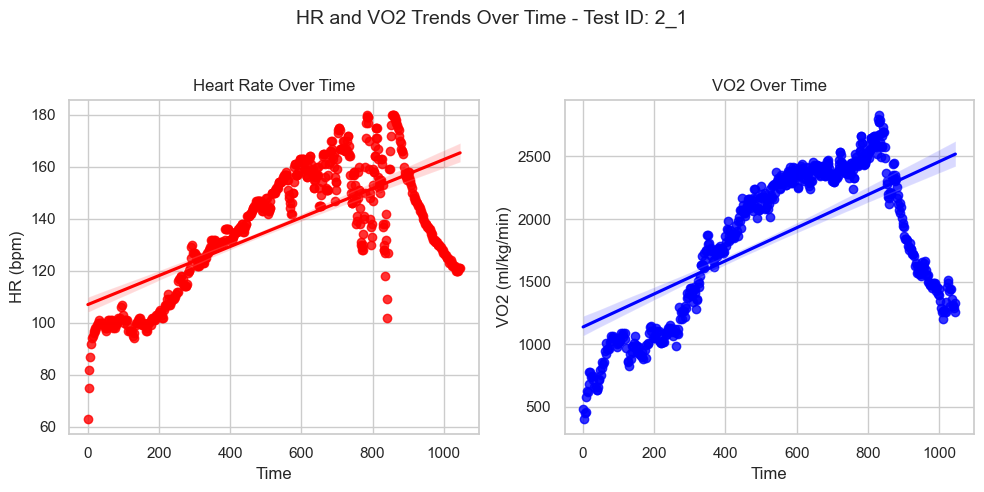

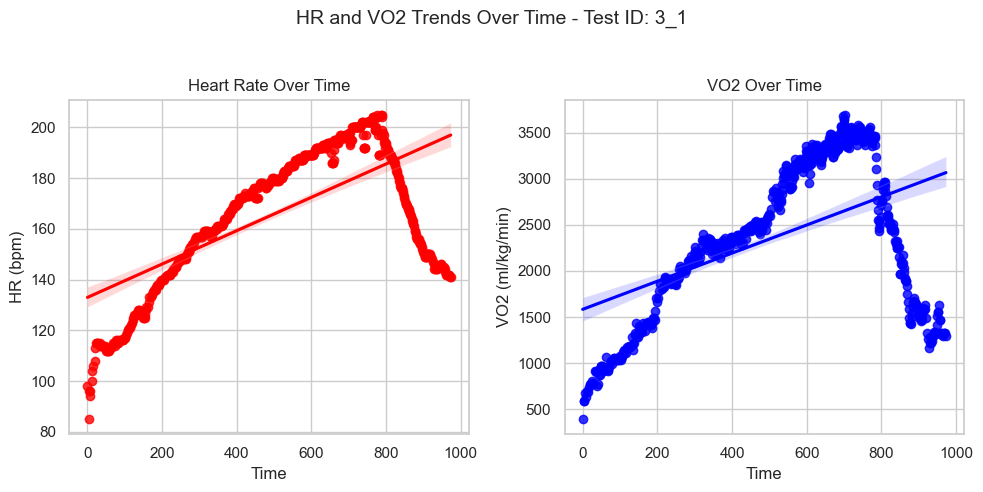

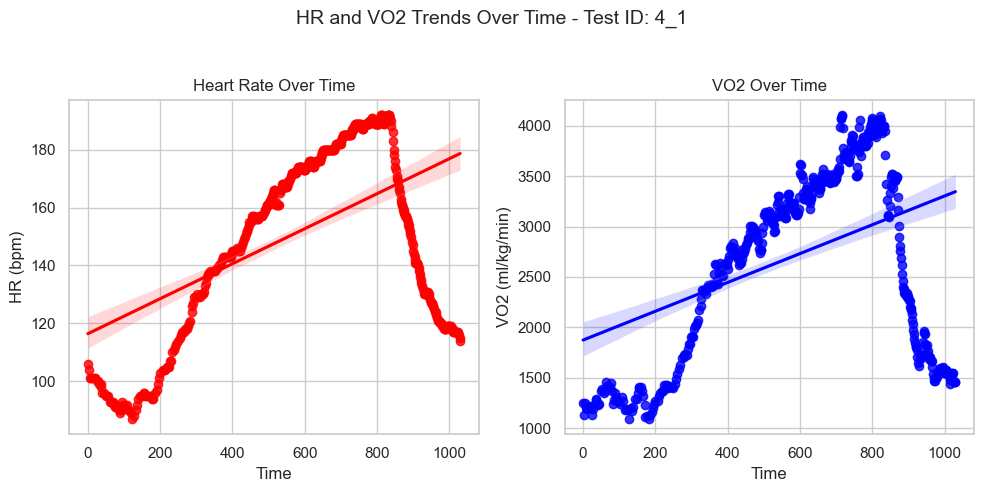

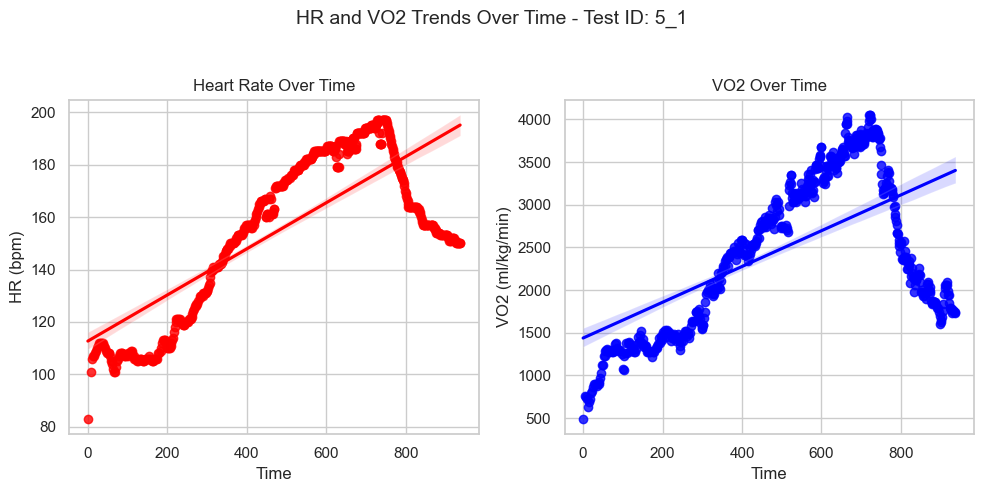

In [92]:
#38Plot the changes in HR and VO2 over time for each ID_test. Add a trendline to compare the HR and VO2 changes.

# Set Seaborn style
sns.set(style="whitegrid")

# Plot HR and VO2 over time with trendlines for each ID_test
for test_id in df2['ID_test'].unique()[:4]:
    subset = df2[df2['ID_test'] == test_id]
    
    plt.figure(figsize=(10, 5))
    plt.suptitle(f'HR and VO2 Trends Over Time - Test ID: {test_id}', fontsize=14)
    
    # HR plot with trendline
    plt.subplot(1, 2, 1)
    sns.regplot(x='time', y='HR', data=subset, scatter=True, color='red')
    plt.title('Heart Rate Over Time')
    plt.xlabel('Time')
    plt.ylabel('HR (bpm)')
    
    # VO2 plot with trendline
    plt.subplot(1, 2, 2)
    sns.regplot(x='time', y='VO2', data=subset, scatter=True, color='blue')
    plt.title('VO2 Over Time')
    plt.xlabel('Time')
    plt.ylabel('VO2 (ml/kg/min)')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [94]:
#39.Find the average HRV for individual athletes, using short-term variability analysis(RMSSD).


# Function to calculate RMSSD
def calculate_rmssd(rr_intervals):
    rr_diff = np.diff(rr_intervals)
    squared_diff = rr_diff ** 2
    rmssd = np.sqrt(np.mean(squared_diff))
    return rmssd

# Group by athlete and calculate RMSSD
rmssd_df = df2.groupby('ID')['RR'].apply(lambda x: calculate_rmssd(x.values)).reset_index()
rmssd_df.columns = ['ID', 'RMSSD']

# Display results
print("Average HRV (RMSSD) per athlete:")
print(rmssd_df)



Average HRV (RMSSD) per athlete:
      ID     RMSSD
0      1  0.974321
1      2  1.243954
2      3  2.004135
3      4  1.630999
4      5  1.472155
..   ...       ...
852  853  1.418076
853  854  1.649630
854  855  1.441412
855  856  2.802726
856  857  1.631976

[857 rows x 2 columns]


In [72]:
#40.Identify the test that took the longest time to complete.

# Drop rows with missing time or ID_test
df = df2[['ID_test', 'time']].dropna()

# Calculate duration for each test
duration_df = df.groupby('ID_test')['time'].agg(['min', 'max'])
duration_df['duration'] = duration_df['max'] - duration_df['min']

# Identify the test with the longest duration
longest_test_id = duration_df['duration'].idxmax()
longest_duration = duration_df['duration'].max()

# Display result
print(f"The test that took the longest time is '{longest_test_id}' with a duration of {longest_duration:.2f} units.")


The test that took the longest time is '699_1' with a duration of 1712.00 units.


In [ ]:

#41 Perform an EDA of subject_info using YDATA Profiling.

# Create the profiling report
profile = ProfileReport(df1, title="Subject Info EDA Report", explorative=True)
display(profile.to_notebook_iframe())

# Save the report to an HTML file
profile.to_file("subject_info_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 90.75it/s]


In [80]:
#42."How does respiration rate progress based on treadmill speed for different BMI levels? Visualize this relationship and find which BMI level has the highest mean respiration rate?"


# Copy the original dataframe to avoid modifying it directly
df = merged_df.copy()

# Convert height from cm to meters
df['Height_m'] = df['Height'] / 100

# Calculate BMI
df['BMI'] = df['Weight'] / (df['Height_m'] ** 2)
print("\nBMI:")
print(grouped)

# Convert BMI into categorical BMI levels
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_Level'] = pd.cut(df['BMI'], bins=bins, labels=labels)

# Drop rows with missing respiration rate or BMI level
df_clean = df.dropna(subset=['RR', 'BMI_Level', 'Speed'])

# Grouping by BMI level and treadmill speed, calculate mean RR
grouped = df_clean.groupby(['BMI_Level', 'Speed'], observed=False)['RR'].mean().reset_index()


# Plot the respiration rate vs treadmill speed for each BMI level
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='Speed', y='RR', hue='BMI_Level', marker='o')
plt.title('Respiration Rate vs Treadmill Speed by BMI Level')
plt.xlabel('Treadmill Speed')
plt.ylabel('Average Respiration Rate')
plt.legend(title='BMI Level')
plt.grid(True)
plt.tight_layout()
plt.show()

# Finding the BMI level with the highest mean respiration rate
mean_rr_by_bmi = df_clean.groupby('BMI_Level', observed=False)['RR'].mean()

if not mean_rr_by_bmi.empty:
    highest_bmi_level = mean_rr_by_bmi.idxmax()
    highest_mean_rr = mean_rr_by_bmi.max()
    print(f"\nBMI level with the highest mean respiration rate: {highest_bmi_level} ({highest_mean_rr:.2f} breaths/min)")
else:
    print("\nNo valid respiration rate data available to determine the highest BMI level.")



BMI:


NameError: name 'grouped' is not defined

In [82]:
#43 Identify cases of possible bradycardia at rest and display number of athletes based on gender.

# Identify cases of possible bradycardia (Resting HR < 60 BPM)
bradycardia_cases = df2[df2['HR'] < 60]


# Count values in 'sex' column
sex_counts = df1['Sex'].value_counts()

# Map counts to labels
num_males = sex_counts.get(0, 0)
num_females = sex_counts.get(1, 0)

print(f"Number of males: {num_males}")
print(f"Number of females: {num_females}")

# Count number of affected athletes by gender
#bradycardia_counts = bradycardia_cases['sex'].value_counts()

# Display results
print("Cases of Possible Bradycardia:")
print(bradycardia_cases)

#print("\nNumber of Athletes with Bradycardia by Gender:")
#print(bradycardia_counts)

Number of males: 843
Number of females: 149
Cases of Possible Bradycardia:
        time  Speed    HR    VO2   VCO2  RR    VE ID_test   ID  \
5146       5    5.0  57.0  574.0  493.0  17  14.3    10_1   10   
5765       4    5.0  38.0  243.0  197.0  31   7.4    11_1   11   
7435      10    0.0  35.0  245.0  258.0  10   7.9     1_1    1   
8493       7    5.0  35.0  660.0  533.0  22  18.7   15_39   15   
9231       4    5.0  19.0  833.0  659.0  28  22.1   15_27   15   
...      ...    ...   ...    ...    ...  ..   ...     ...  ...   
572219    32    0.0  56.0  207.0  196.0  20   8.8   855_1  855   
572220    37    0.0  56.0  233.0  215.0  17   8.7   855_1  855   
572221    43    0.0  57.0  238.0  220.0  17   8.9   855_1  855   
572222    46    0.0  57.0  246.0  222.0  17   8.9   855_1  855   
572223    49    4.9  59.0  295.0  264.0  17   9.8   855_1  855   

                    HR Zone  
5146    Zone 1 (Very Light)  
5765    Zone 1 (Very Light)  
7435    Zone 1 (Very Light)  
8493    Zone

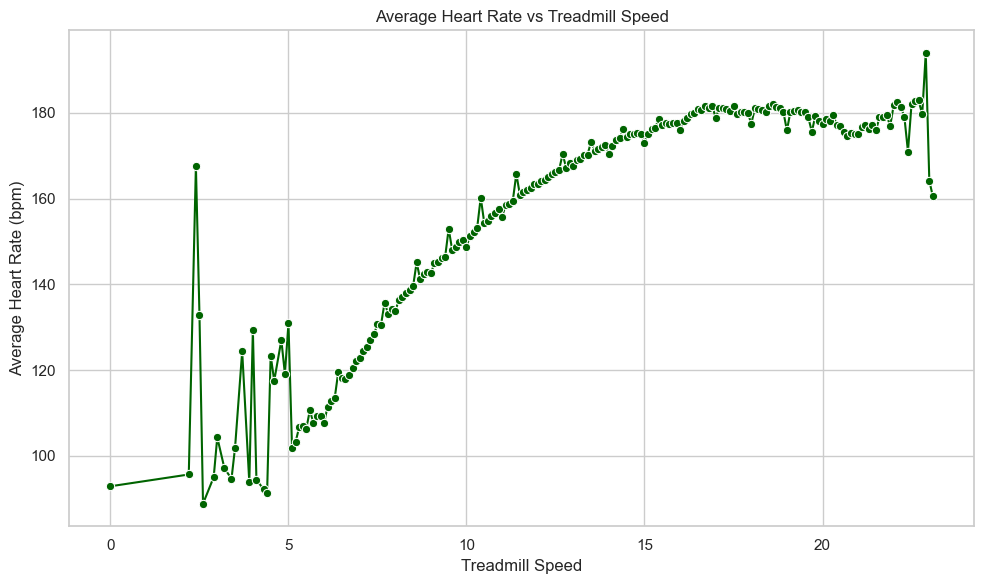

In [84]:
#44.Calculate the average heart rate corresponding to the speed of the treadmill and  plot a line graph to visualize the relationship.


# Drop rows with missing values in Speed or HR
df_clean = df2.dropna(subset=['Speed', 'HR'])

# Calculate average HR for each treadmill speed
avg_hr_by_speed = df_clean.groupby('Speed')['HR'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_hr_by_speed, x='Speed', y='HR', marker='o', color='darkgreen')
plt.title('Average Heart Rate vs Treadmill Speed')
plt.xlabel('Treadmill Speed')
plt.ylabel('Average Heart Rate (bpm)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\soorn\AppData\Local\Temp\ipykernel_30704\2709218665.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean['Stage'] = df_clean.groupby('ID_test', group_keys=False).apply(categorize_stage)
C:\Users\soorn\AppData\Local\Temp\ipykernel_30704\2709218665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Stage'] = df_clean.groupby('ID_test', group_keys=False).apply(categorize_stage)


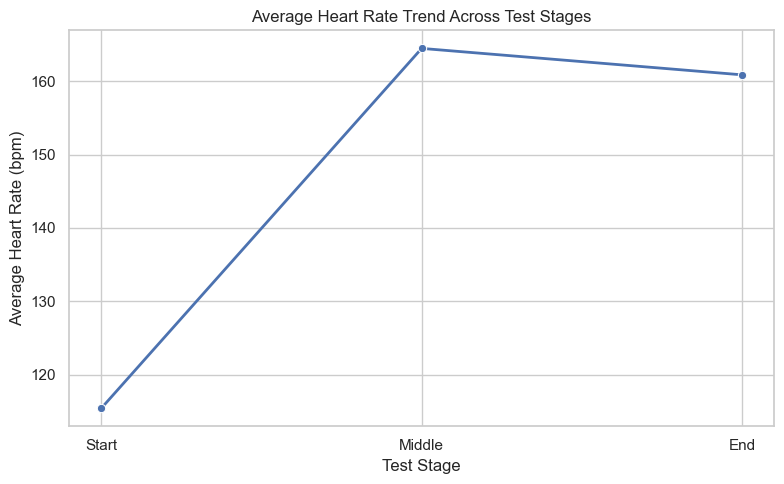


Average HR by Test Stage:
Stage
Start     115.44
Middle    164.45
End       160.85
Name: HR, dtype: float64

Overall trend in heart rate across the test: variable


In [86]:
#45.Analyze the trend of HR at the start of the test vs the middle and the end.What is the overall trend?


# Drop rows with missing HR or time values
df_clean = df2.dropna(subset=['time', 'HR'])

# Function to label each row as Start, Middle, or End based on time
def categorize_stage(group):
    time_sorted = group.sort_values('time')
    n = len(time_sorted)
    if n < 3:
        return pd.Series(['Start'] * n, index=group.index)  # Fallback for very short tests
    labels = ['Start'] * (n // 3) + ['Middle'] * (n // 3) + ['End'] * (n - 2 * (n // 3))
    return pd.Series(labels, index=time_sorted.index)

# Apply the function to label test stages
df_clean['Stage'] = df_clean.groupby('ID_test', group_keys=False).apply(categorize_stage)

# Calculate the average HR at each stage
avg_hr_by_stage = df_clean.groupby('Stage')['HR'].mean().reindex(['Start', 'Middle', 'End'])

# Plotting the HR trend
plt.figure(figsize=(8, 5))
sns.lineplot(x=avg_hr_by_stage.index, y=avg_hr_by_stage.values, marker='o', linewidth=2)
plt.title('Average Heart Rate Trend Across Test Stages')
plt.xlabel('Test Stage')
plt.ylabel('Average Heart Rate (bpm)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the results
print("\nAverage HR by Test Stage:")
print(avg_hr_by_stage.round(2))

# Determine the trend
if avg_hr_by_stage.is_monotonic_increasing:
    trend = "increasing"
elif avg_hr_by_stage.is_monotonic_decreasing:
    trend = "decreasing"
else:
    trend = "variable"

print(f"\nOverall trend in heart rate across the test: {trend}")


In [ ]:
46